h = 0.1 | ff = -0.887518521079419 | err = 0.007614379786265613 | bf = -0.9203543413597404 | err 0.01844758535633395
h = 0.01 | ff = -0.904321551646553 | err = 0.0012865089943149832 | bf = -0.9076152373688418 | err 0.001394980652860256
h = 0.001 | ff = -0.9058240206696322 | err = 0.0001335700170368992 | bf = -0.9061533993448001 | err 0.00013465474721560677
h = 0.0001 | ff = -0.9059724442250783 | err = 1.3405852463538315e-05 | bf = -0.9060053821008385 | err 1.3416699766538587e-05
h = 1e-05 | ff = -0.9059872683070401 | err = 1.3410734129026827e-06 | bf = -0.9059905620945051 | err 1.3411818859665472e-06
h = 1.0000000000000002e-06 | ff = -0.9059887506324137 | err = 1.3411222274384293e-07 | bf = -0.9059890798690516 | err 1.341133073207157e-07
h = 1.0000000000000002e-07 | ff = -0.9059888977924755 | err = 1.3411270954888366e-08 | bf = -0.9059889327645008 | err 1.341128200160746e-08


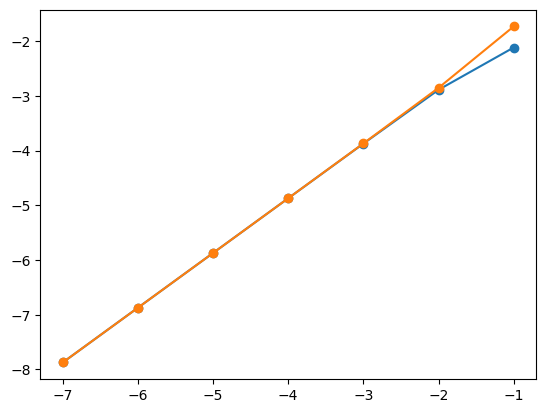

In [26]:
import numpy as np
import pylab as py

def f(x):
    return np.cos(x)*np.tanh(x)

def forwardf(x):
    return (f(x + h) - f(x)) / h

def backwardf(x):
    return (f(x) - f(x - h)) / h

h = 1E-1
x = 2
forward = np.zeros([7])
ferr = np.zeros([7])
backward = np.zeros([7])
berr = np.zeros([7])
i = 0

while i < 7:
    forward[i] = forwardf(x)
    ferr[i] = -0.5 * forwardf(forward[i]) * h
    backward[i] = backwardf(x)
    berr[i] = -0.5 * backwardf(backward[i]) * h
    print(f'h = {h} | ff = {forward[i]} | err = {ferr[i]} | bf = {backward[i]} | err {berr[i]}')
    h /= 10
    i += 1


i = 0
x = [-1, -2, -3, -4, -5, -6, -7]
yf = np.zeros([7])
yb = np.zeros([7])
for i, N in enumerate(ferr):
    yf[i] = np.log10(ferr[i])

for i, N in enumerate(berr):
    yb[i] = np.log10(berr[i])

py.plot(x, yf,'o-')
py.plot(x, yb,'-o')
py.show()

Down to 10^-12

h = 0.1 | ff = -0.887518521079419 | err = 0.007614379786265613 | bf = -0.9203543413597404 | err 0.01844758535633395
h = 0.01 | ff = -0.904321551646553 | err = 0.0012865089943149832 | bf = -0.9076152373688418 | err 0.001394980652860256
h = 0.001 | ff = -0.9058240206696322 | err = 0.0001335700170368992 | bf = -0.9061533993448001 | err 0.00013465474721560677
h = 0.0001 | ff = -0.9059724442250783 | err = 1.3405852463538315e-05 | bf = -0.9060053821008385 | err 1.3416699766538587e-05
h = 1e-05 | ff = -0.9059872683070401 | err = 1.3410734129026827e-06 | bf = -0.9059905620945051 | err 1.3411818859665472e-06
h = 1.0000000000000002e-06 | ff = -0.9059887506324137 | err = 1.3411222274384293e-07 | bf = -0.9059890798690516 | err 1.341133073207157e-07
h = 1.0000000000000002e-07 | ff = -0.9059888977924755 | err = 1.3411270954888366e-08 | bf = -0.9059889327645008 | err 1.341128200160746e-08
h = 1.0000000000000002e-08 | ff = -0.9059889061191482 | err = 1.3411275701091796e-09 | bf = -0.9059889172213784 |

/tmp/ipykernel_564/273980570.py:36: RuntimeWarning: invalid value encountered in log10
  yf[i] = np.log10(ferr[i])
/tmp/ipykernel_564/273980570.py:39: RuntimeWarning: invalid value encountered in log10
  yb[i] = np.log10(berr[i])


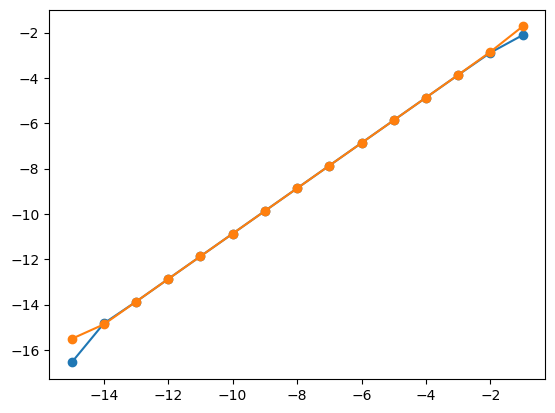

In [2]:
import numpy as np
import pylab as py

def f(x):
    return np.cos(x)*np.tanh(x)

def forwardf(x):
    return (f(x + h) - f(x)) / h

def backwardf(x):
    return (f(x) - f(x - h)) / h

h = 1E-1
x = 2
forward = np.zeros([20])
ferr = np.zeros([20])
backward = np.zeros([20])
berr = np.zeros([20])
i = 0

while i < 20:
    forward[i] = forwardf(x)
    ferr[i] = -0.5 * forwardf(forward[i]) * h
    backward[i] = backwardf(x)
    berr[i] = -0.5 * backwardf(backward[i]) * h
    print(f'h = {h} | ff = {forward[i]} | err = {ferr[i]} | bf = {backward[i]} | err {berr[i]}')
    h /= 10
    i += 1


i = 0
x = [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20]
yf = np.zeros([20])
yb = np.zeros([20])
for i, N in enumerate(ferr):
    yf[i] = np.log10(ferr[i])

for i, N in enumerate(berr):
    yb[i] = np.log10(berr[i])

py.plot(x, yf,'o-')
py.plot(x, yb,'-o')
py.show()

The machine error really kills it for lower than 10^-12, to the point where by 10^-16 the value of the 
derivative is just zero. Now I'll do central difference, i.e. HW 3.1

h = 0.1 | cf = -0.9039364312195797 | err = 0.002052483994440024
h = 0.01 | cf = -0.9059683945076974 | err = 2.0520706322302296e-05
h = 0.001 | cf = -0.9059887100072161 | err = 2.0520680354962906e-07
h = 0.0001 | cf = -0.9059889131629584 | err = 2.0510613207846973e-09
h = 1e-05 | cf = -0.9059889152007726 | err = 1.3247070107524905e-11
h = 1.0000000000000002e-06 | cf = -0.9059889152507327 | err = 3.671296600060714e-11
h = 1.0000000000000002e-07 | cf = -0.9059889152784881 | err = 6.446843059393359e-11


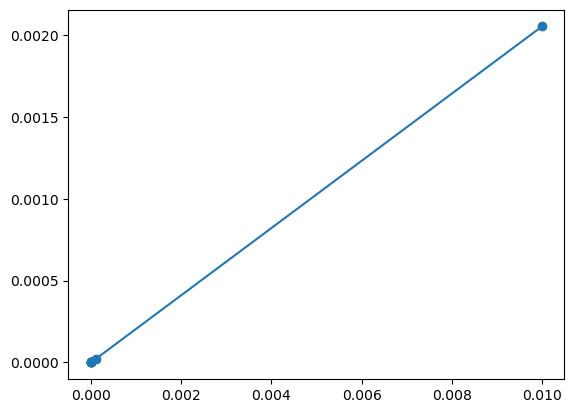

In [25]:
import numpy as np
import pylab as py

def f(x):
    return np.cos(x)*np.tanh(x)

def centralf(x):
    return (f(x + h) - f(x - h)) / (2 * h)

h = 1E-1
size = 7
x = 2
central = np.zeros([size])
cerr = np.zeros([size])
harr = np.zeros([size])
i = 0

while i < size:
    central[i] = centralf(x)
    cerr[i] = abs((-np.sin(x) * np.tanh(x) + np.cos(x) * pow(1 / np.cosh(x), 2)) - central[i])
    harr[i] = pow(h, 2)
    print(f'h = {h} | cf = {central[i]} | err = {cerr[i]}')
    h /= 10
    i += 1

py.plot(harr, cerr,'o-')
py.show()

It does appear to be proportional, so that is good, although really this graph is deceiving. I'll move on to HW 3.2

In [18]:
import numpy as np
import pylab as py

def f(x):
    return np.cos(x)*np.tanh(x)

def fivef(x):
    return (f(x + h) - f(x - h)) / (2 * h)

h = 1E-1
size = 7
x = 2
five = np.zeros([size])
ferr = np.zeros([size])

i = 0
while i < size:
    five[i] = fivef(x)
    ferr[i] = abs((-np.sin(x) * np.tanh(x) + np.cos(x) * pow(1 / np.cosh(x), 2)) - central[i])
    print(f'h = {h} | ff = {five[i]} | err = {ferr[i]}')
    h /= 10
    i += 1

#py.plot(harr, cerr,'o-')
#py.show()

h = 0.1 | ff = -0.9039364312195797 | err = 0.002052483994440024
h = 0.01 | ff = -0.9059683945076974 | err = 2.0520706322302296e-05
h = 0.001 | ff = -0.9059887100072161 | err = 2.0520680354962906e-07
h = 0.0001 | ff = -0.9059889131629584 | err = 2.0510613207846973e-09
h = 1e-05 | ff = -0.9059889152007726 | err = 1.3247070107524905e-11
h = 1.0000000000000002e-06 | ff = -0.9059889152507327 | err = 3.671296600060714e-11
h = 1.0000000000000002e-07 | ff = -0.9059889152784881 | err = 6.446843059393359e-11


The code works well

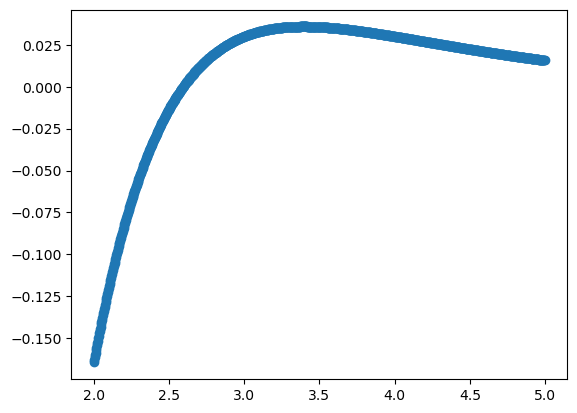

In [45]:
import numpy as np
import pylab as py

def f(x):
    return np.log(x) / np.cosh(x)

def secondf(x):
    return (f(x + h) - 2 * f(x) + f(x - h)) / pow(h, 2)

h = 1E-5
num = 1000
x = np.zeros([num])
second = np.zeros([num])
x[0] = 2
second[0] = secondf(x[0])
i = 1
while i < num:
    x[i] = x[i - 1] + 3 / num
    second[i] = secondf(x[i])
    i += 1

py.plot(x, second,'o-')
py.show()

This second derivative appears to go to zero as x goes to infinity. This makes sense, because ln(x)

It is negative from 2 < x < ~2.6 and is positive from ~2.6 < x < 5 [on to infinity]. This x intercept is a turning point,
where the original function goes from being concave down to concave up